<a href="https://colab.research.google.com/github/phuocthok18/AI_HKI_2022_2023/blob/main/bt_cnn_tienvn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Nhận dạng **tiền việt nam:** 
https://drive.google.com/drive/folders/18p-H2Q7W4T_HY1D2SxVaZ4T7HZRoxFou?usp=share_link

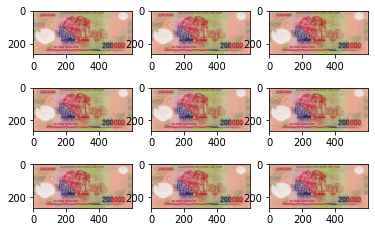

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.image import imread

folder= '/content/drive/MyDrive/NhanDangTienVN/'
for i in range(9):
  plt.subplot(330+i+1)
  filename = folder+'HaiTram_sau'+str(i+1)+'.jpg'
  image = imread(filename)
  plt.imshow(image)
plt.show()


In [ ]:
from os import listdir
from numpy import asarray
from numpy import save
from tensorflow.keras.utils import load_img, img_to_array
from keras.preprocessing import  image
from keras.utils import np_utils

photos, labels = list(), list()
for file in listdir(folder):
  if file.startswith('HaiTram_sau'):
    output = 0
    photo = load_img(folder+file,target_size=(150,450))
    photo = img_to_array(photo)
    photos.append(photo)
    labels.append(output)

for file in listdir(folder):
  if file.startswith('HaiTram_truoc'):
    output = 1
    photo = load_img(folder+file,target_size=(150,450))
    photo = img_to_array(photo)
    photos.append(photo)
    labels.append(output)

for file in listdir(folder):
  if file.startswith('MotTram_sau'):
    output = 2
    photo = load_img(folder+file,target_size=(150,450))
    photo = img_to_array(photo)
    photos.append(photo)
    labels.append(output)

for file in listdir(folder):
  if file.startswith('MotTram_truoc'):
    output = 3
    photo = load_img(folder+file,target_size=(150,450))
    photo = img_to_array(photo)
    photos.append(photo)
    labels.append(output)

for file in listdir(folder):
  if file.startswith('NamTram_sau'):
    output = 4
    photo = load_img(folder+file,target_size=(150,450))
    photo = img_to_array(photo)
    photos.append(photo)
    labels.append(output)

for file in listdir(folder):
  if file.startswith('NamTram_truoc'):
    output = 5
    photo = load_img(folder+file,target_size=(150,450))
    photo = img_to_array(photo)
    photos.append(photo)
    labels.append(output)

photos = asarray(photos)
photos = photos.reshape(60,150,450,3)
labels = asarray(labels)
labels = np_utils.to_categorical(labels)
print(photos.shape,labels.shape)

(60, 150, 450, 3) (60, 6)


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(photos, labels, test_size=0.3)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(42, 150, 450, 3)
(18, 150, 450, 3)
(42, 6)
(18, 6)


In [ ]:
from keras import Sequential
from keras.layers import Conv2D, Dense, MaxPooling2D, Flatten
model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3),activation='relu',input_shape=(150,450,3), padding='same'))
model.add(MaxPooling2D((2,2), padding = 'same'))
model.add(Conv2D(64, kernel_size=(3,3),activation='relu', padding='same'))
model.add(MaxPooling2D((2,2), padding = 'same'))
model.add(Conv2D(128, kernel_size=(3,3), activation='relu', padding='same'))
model.add(MaxPooling2D((2,2), padding = 'same'))
model.add(Conv2D(256, kernel_size=(3,3), activation='relu', padding='same'))
model.add(MaxPooling2D((2,2), padding = 'same'))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(6, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 450, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 225, 32)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 225, 64)       18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 38, 113, 64)      0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 38, 113, 128)      73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 19, 57, 128)      0

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs = 50, verbose=2)

Epoch 1/50
2/2 - 12s - loss: 288.1260 - accuracy: 0.0952 - val_loss: 467.7153 - val_accuracy: 0.1667 - 12s/epoch - 6s/step
Epoch 2/50
2/2 - 0s - loss: 428.3509 - accuracy: 0.1429 - val_loss: 40.3261 - val_accuracy: 0.1667 - 173ms/epoch - 87ms/step
Epoch 3/50
2/2 - 0s - loss: 32.6544 - accuracy: 0.2619 - val_loss: 6.3962 - val_accuracy: 0.2778 - 162ms/epoch - 81ms/step
Epoch 4/50
2/2 - 0s - loss: 3.7754 - accuracy: 0.4524 - val_loss: 8.5832 - val_accuracy: 0.3333 - 171ms/epoch - 86ms/step
Epoch 5/50
2/2 - 0s - loss: 8.9725 - accuracy: 0.3571 - val_loss: 1.5043 - val_accuracy: 0.6111 - 163ms/epoch - 81ms/step
Epoch 6/50
2/2 - 0s - loss: 1.3161 - accuracy: 0.6905 - val_loss: 0.6054 - val_accuracy: 0.7222 - 156ms/epoch - 78ms/step
Epoch 7/50
2/2 - 0s - loss: 0.4568 - accuracy: 0.8810 - val_loss: 0.3866 - val_accuracy: 1.0000 - 162ms/epoch - 81ms/step
Epoch 8/50
2/2 - 0s - loss: 0.3352 - accuracy: 1.0000 - val_loss: 0.1039 - val_accuracy: 1.0000 - 165ms/epoch - 82ms/step
Epoch 9/50
2/2 - 0s

In [ ]:
metric = model.evaluate(X_test, Y_test, verbose=2)
print('sai so:', metric[0])
print('do chinh xac:', metric[1])

1/1 - 0s - loss: 0.0000e+00 - accuracy: 1.0000 - 59ms/epoch - 59ms/step
sai so: 0.0
do chinh xac: 1.0


Text(0.5, 0, 'So lan hoc')

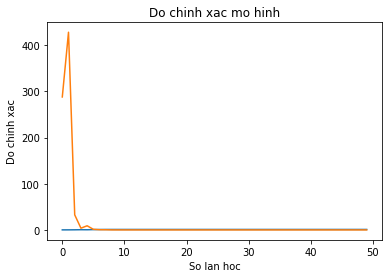

In [ ]:
from matplotlib import pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.title('Do chinh xac mo hinh')
plt.ylabel('Do chinh xac')
plt.xlabel('So lan hoc')

1/1 [==============================] - 0s 16ms/step
Tờ tiền: Hai trăm


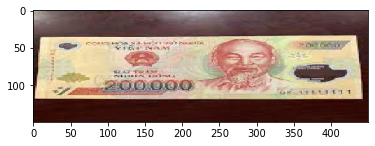

In [ ]:
from tensorflow.keras.utils import load_img, img_to_array
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pic = load_img('/content/tien200k.jpg', target_size=(150,450)) 
plt.imshow(pic)
pic = img_to_array(pic)
pic = pic.reshape(1,150,450,3) 
pic = pic.astype('float32')
pic = pic/255
classname=['Hai trăm','Hai trăm','Một trăm','Một trăm','Năm trăm','Năm trăm']
a = int(np.argmax(model.predict(pic), axis=1))
print('Tờ tiền:',classname[a])

1/1 [==============================] - 0s 16ms/step
Tờ tiền: Hai trăm


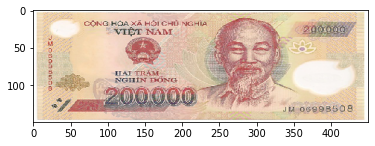

In [ ]:
pic = load_img('/content/drive/MyDrive/NhanDangTienVN/HaiTram_truoc1.jpg', target_size=(150,450)) 
plt.imshow(pic)
pic = img_to_array(pic)
pic = pic.reshape(1,150,450,3) 
pic = pic.astype('float32')
pic = pic/255
classname=['Hai trăm','Hai trăm','Một trăm','Một trăm','Năm trăm','Năm trăm']
a = int(np.argmax(model.predict(pic), axis=1))
print('Tờ tiền:',classname[a])

1/1 [==============================] - 0s 15ms/step
Tờ tiền: Một trăm


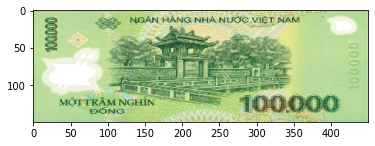

In [ ]:
pic = load_img('/content/drive/MyDrive/NhanDangTienVN/MotTram_sau10.jpg', target_size=(150,450)) 
plt.imshow(pic)
pic = img_to_array(pic)
pic = pic.reshape(1,150,450,3) 
pic = pic.astype('float32')
pic = pic/255
classname=['Hai trăm','Hai trăm','Một trăm','Một trăm','Năm trăm','Năm trăm']
a = int(np.argmax(model.predict(pic), axis=1))
print('Tờ tiền:',classname[a])

1/1 [==============================] - 0s 15ms/step
Tờ tiền: Một trăm


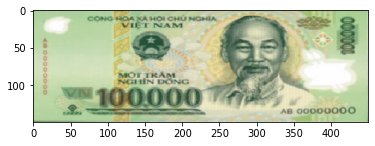

In [ ]:
pic = load_img('/content/drive/MyDrive/NhanDangTienVN/MotTram_truoc1.jpg', target_size=(150,450)) 
plt.imshow(pic)
pic = img_to_array(pic)
pic = pic.reshape(1,150,450,3) 
pic = pic.astype('float32')
pic = pic/255
classname=['Hai trăm','Hai trăm','Một trăm','Một trăm','Năm trăm','Năm trăm']
a = int(np.argmax(model.predict(pic), axis=1))
print('Tờ tiền:',classname[a])

1/1 [==============================] - 0s 18ms/step
Tờ tiền: Năm trăm


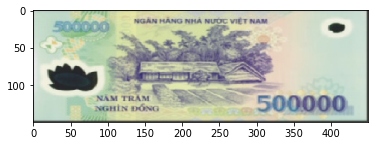

In [ ]:
pic = load_img('/content/drive/MyDrive/NhanDangTienVN/NamTram_sau1.jpg', target_size=(150,450)) 
plt.imshow(pic)
pic = img_to_array(pic)
pic = pic.reshape(1,150,450,3) 
pic = pic.astype('float32')
pic = pic/255
classname=['Hai trăm','Hai trăm','Một trăm','Một trăm','Năm trăm','Năm trăm']
a = int(np.argmax(model.predict(pic), axis=1))
print('Tờ tiền:',classname[a])

1/1 [==============================] - 0s 16ms/step
Tờ tiền: Năm trăm


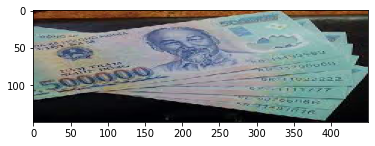

In [ ]:
pic = load_img('/content/tien500.jpg', target_size=(150,450)) 
plt.imshow(pic)
pic = img_to_array(pic)
pic = pic.reshape(1,150,450,3) 
pic = pic.astype('float32')
pic = pic/255
classname=['Hai trăm','Hai trăm','Một trăm','Một trăm','Năm trăm','Năm trăm']
a = int(np.argmax(model.predict(pic), axis=1))
print('Tờ tiền:',classname[a])